# Transformers

## SlidingWindow

#### Mapping Labels to Sliding Window Features

Note: Some of the details might be out of date, but the general idea remains the same.
For example, I think we pad the input (RMS) data to ensure the sliding window/offset calcs
come out as integers.

It's easier to understand visually:

For a Sliding Window size = 16
```
     Sliding Window[6]           sliding_window[6].shape = (16,)
 012345 6789012345678901 2345678  index visualization
 ------|----------------|-------  waveform
                   |
                   V              y-offset = 11
 000000 0000000011111111 1111000  speech/no speech labels
                   1              label corresponding to sliding_window[6] -> label[17]


Mapping of sliding window to label
sliding_window[0]  -> 0 label[11]
sliding_window[1]  -> 0 label[12]
sliding_window[2]  -> 1 label[13]
sliding_window[3]  -> 1 label[14]
sliding_window[4]  -> 1 label[15]
sliding_window[5]  -> 1 label[16]
sliding_window[6]  -> 1 label[17]
sliding_window[7]  -> 1 label[18]
...
sliding_window[11] -> 1 label[24]
sliding_window[12] -> 1 label[25]
sliding_window[13] -> 0 label[26]
sliding_window[14] -> 0 label[27]
...
```

For our speech analysis, what comes after does have an effect on the present, but the past has more of
an impact. So say for this example, we look behind 11 points, and look ahead 4 points. This gives us a total window
size of 16 points (since we include our current point). So our sliding window has a size of 16.

So for the very first sliding window,

`window[0]` has `waveform[0:15]` and the associated label is `label[11]` -> `0 [Speech Not Present]`.

As we continue to slide the window, say 6 more times,

`window[6]` -> `waveform[17]` -> `label[17]` -> `1 [Speech Present]`.

This will generate our `y` that we want the window data to predict. So

```
X (feature)                 |  y (label)
window[0] = waveform[0:16]  |  y[0] = label[11] = 0
window[1] = waveform[1:17]  |  y[1] = label[12] = 0
window[2] = waveform[2:18]  |  y[2] = label[13] = 1
window[3] = waveform[3:19]  |  y[3] = label[14] = 1
window[4] = waveform[4:20]  |  y[4] = label[15] = 1
...
```

Note that the `y` we predict will be offset from the actual waveform by our "look behind" of 11 points. This is
the "y-offset". So later after we predict `y`, we will need to shift it by `y-offset` to align it with the
original labels and waveform.

{'label': 'Audio length: 58741, sample rate: 44100'}


Audio length: 58741, sample rate: 44100

RMS[INFO]: rms size: 918, reduction factor 14.34375


RMS from wav shape

(918,)

{'label': 'Audio length: 74459, sample rate: 44100'}


Audio length: 74459, sample rate: 44100

RMS[INFO]: rms size: 1164, reduction factor 18.1875


RMS from wav shape

(1164,)

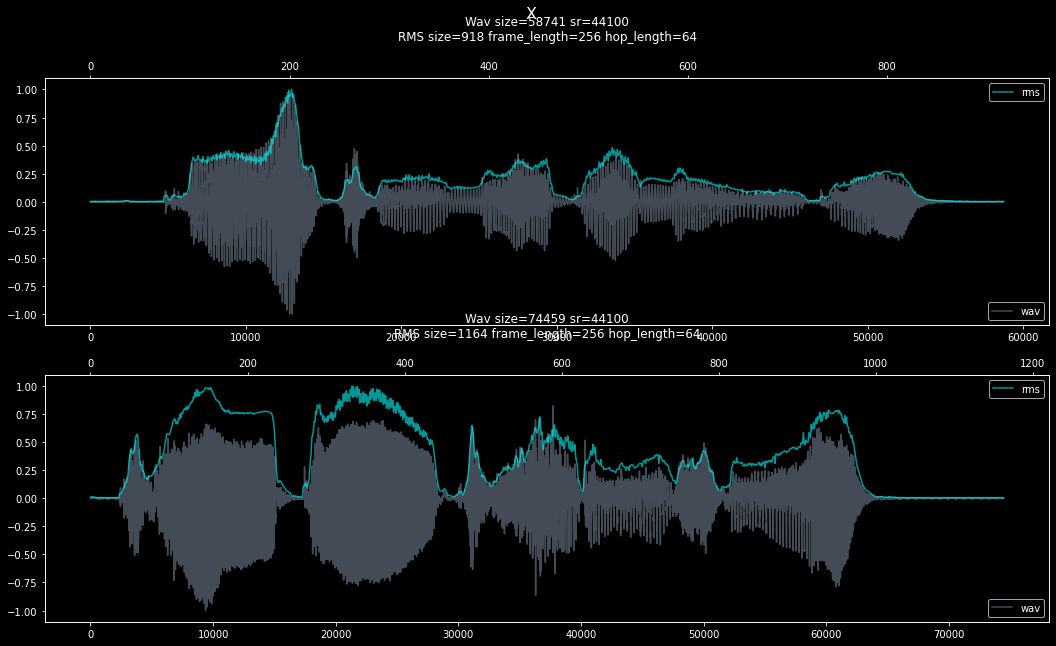

Initial Shape

(1, 7976)

Windowed Shape

(1, 7975, 2)

y,X: before Sliding Window

,y,X
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8
...,...,...
7971,7971,15942
7972,7972,15944
7973,7973,15946
7974,7974,15948


---- SlidingWindow(window=4, offset=0, pad=True) ----

None

SlidingWindow[DEBUG]: Initial X shape: (1, 7976)
SlidingWindow[DEBUG]: Pad Size: (0, 3)
SlidingWindow[DEBUG]: Padded X: (7979,)
SlidingWindow[INFO]: np sliding window shape: (7976, 4)
SlidingWindow[DEBUG]: Initial y shape: (7976,)
SlidingWindow[DEBUG]: final y shape: (7976,)
SlidingWindow[DEBUG]: Final X shape: (7976, 4)
SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (0, 3)
SlidingWindow[DEBUG]: Padded X: (7979,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 4)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 4)


y,X: SlidingWindow(window=4, offset=0, pad=True)

,y,X
0,0,"[0, 2, 4, 6]"
1,1,"[2, 4, 6, 8]"
2,2,"[4, 6, 8, 10]"
3,3,"[6, 8, 10, 12]"
4,4,"[8, 10, 12, 14]"
...,...,...
7971,7971,"[15942, 15944, 15946, 15948]"
7972,7972,"[15944, 15946, 15948, 15950]"
7973,7973,"[15946, 15948, 15950, 15950]"
7974,7974,"[15948, 15950, 15950, 15950]"


SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (0, 3)
SlidingWindow[DEBUG]: Padded X: (7979,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 4)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 4)


- Sliding Window Transform Only -

(7976, 4)

X after transform

array([[    0,     2,     4,     6],
       [    2,     4,     6,     8],
       [    4,     6,     8,    10],
       ...,
       [15946, 15948, 15950, 15950],
       [15948, 15950, 15950, 15950],
       [15950, 15950, 15950, 15950]])

---- SlidingWindow(window=4, offset=3, pad=True) ----

None

SlidingWindow[DEBUG]: Initial X shape: (1, 7976)
SlidingWindow[DEBUG]: Pad Size: (3, 6)
SlidingWindow[DEBUG]: Padded X: (7985,)
SlidingWindow[INFO]: np sliding window shape: (7982, 4)
SlidingWindow[DEBUG]: Initial y shape: (7976,)
SlidingWindow[DEBUG]: final y shape: (7976,)
SlidingWindow[DEBUG]: Final X shape: (7976, 4)
SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (3, 6)
SlidingWindow[DEBUG]: Padded X: (7985,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7982, 4)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 4)


y,X: SlidingWindow(window=4, offset=3, pad=True)

,y,X
0,0,"[0, 0, 0, 0]"
1,1,"[0, 0, 0, 2]"
2,2,"[0, 0, 2, 4]"
3,3,"[0, 2, 4, 6]"
4,4,"[2, 4, 6, 8]"
...,...,...
7971,7971,"[15936, 15938, 15940, 15942]"
7972,7972,"[15938, 15940, 15942, 15944]"
7973,7973,"[15940, 15942, 15944, 15946]"
7974,7974,"[15942, 15944, 15946, 15948]"


SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (3, 6)
SlidingWindow[DEBUG]: Padded X: (7985,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7982, 4)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 4)


- Sliding Window Transform Only -

(7976, 4)

X after transform

array([[    0,     0,     0,     2],
       [    0,     0,     2,     4],
       [    0,     2,     4,     6],
       ...,
       [15942, 15944, 15946, 15948],
       [15944, 15946, 15948, 15950],
       [15946, 15948, 15950, 15950]])

---- SlidingWindow(window=4, offset=3, pad=False) ----

None

SlidingWindow[DEBUG]: Initial X shape: (1, 7976)
SlidingWindow[DEBUG]: Pad Size: (3, 6)
SlidingWindow[DEBUG]: Padded X: (7985,)
SlidingWindow[INFO]: np sliding window shape: (7982, 4)
SlidingWindow[DEBUG]: Initial y shape: (7976,)
SlidingWindow[DEBUG]: final y shape: (7976,)
SlidingWindow[DEBUG]: Final X shape: (7976, 4)
SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (3, 6)
SlidingWindow[DEBUG]: Padded X: (7985,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7982, 4)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 4)


y,X: SlidingWindow(window=4, offset=3, pad=False)

,y,X
0,0,"[0, 0, 0, 0]"
1,1,"[0, 0, 0, 2]"
2,2,"[0, 0, 2, 4]"
3,3,"[0, 2, 4, 6]"
4,4,"[2, 4, 6, 8]"
...,...,...
7971,7971,"[15936, 15938, 15940, 15942]"
7972,7972,"[15938, 15940, 15942, 15944]"
7973,7973,"[15940, 15942, 15944, 15946]"
7974,7974,"[15942, 15944, 15946, 15948]"


SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (3, 6)
SlidingWindow[DEBUG]: Padded X: (7985,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7982, 4)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 4)


- Sliding Window Transform Only -

(7976, 4)

X after transform

array([[    0,     0,     0,     2],
       [    0,     0,     2,     4],
       [    0,     2,     4,     6],
       ...,
       [15942, 15944, 15946, 15948],
       [15944, 15946, 15948, 15950],
       [15946, 15948, 15950, 15950]])

---- SlidingWindow(window=2, offset=5, pad=True) ----

None

SlidingWindow[DEBUG]: Initial X shape: (1, 7976)
SlidingWindow[DEBUG]: Pad Size: (5, 6)
SlidingWindow[DEBUG]: Padded X: (7987,)
SlidingWindow[INFO]: np sliding window shape: (7986, 2)
SlidingWindow[DEBUG]: Initial y shape: (7976,)
SlidingWindow[DEBUG]: final y shape: (7976,)
SlidingWindow[DEBUG]: Final X shape: (7976, 2)
SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (5, 6)
SlidingWindow[DEBUG]: Padded X: (7987,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7986, 2)
SlidingWindow[WARNING]: My stupid hack breaks if the offset is larger than window size
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (0, 2)


y,X: SlidingWindow(window=2, offset=5, pad=True)

,y,X
0,0,"[0, 0]"
1,1,"[0, 0]"
2,2,"[0, 0]"
3,3,"[0, 0]"
4,4,"[0, 0]"
...,...,...
7971,7971,"[15932, 15934]"
7972,7972,"[15934, 15936]"
7973,7973,"[15936, 15938]"
7974,7974,"[15938, 15940]"


SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (5, 6)
SlidingWindow[DEBUG]: Padded X: (7987,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7986, 2)
SlidingWindow[WARNING]: My stupid hack breaks if the offset is larger than window size
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (0, 2)


- Sliding Window Transform Only -

(0, 2)

X after transform

array([], shape=(0, 2), dtype=int64)

---- SlidingWindow(window=128, offset=64, pad=True) ----

None

SlidingWindow[DEBUG]: Initial X shape: (1, 7976)
SlidingWindow[DEBUG]: Pad Size: (64, 191)
SlidingWindow[DEBUG]: Padded X: (8231,)
SlidingWindow[INFO]: np sliding window shape: (8104, 128)
SlidingWindow[DEBUG]: Initial y shape: (7976,)
SlidingWindow[DEBUG]: final y shape: (7976,)
SlidingWindow[DEBUG]: Final X shape: (7976, 128)
SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (64, 191)
SlidingWindow[DEBUG]: Padded X: (8231,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (8104, 128)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 128)


y,X: SlidingWindow(window=128, offset=64, pad=True)

,y,X
0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
7971,7971,"[15814, 15816, 15818, 15820, 15822, 15824, 158..."
7972,7972,"[15816, 15818, 15820, 15822, 15824, 15826, 158..."
7973,7973,"[15818, 15820, 15822, 15824, 15826, 15828, 158..."
7974,7974,"[15820, 15822, 15824, 15826, 15828, 15830, 158..."


SlidingWindow[DEBUG]: Transform shapes, X: (1, 7976), y:--
SlidingWindow[DEBUG]: Pad Size: (64, 191)
SlidingWindow[DEBUG]: Padded X: (8231,)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (8104, 128)
SlidingWindow[DEBUG]: X shape: (1, 7976), fitted shape: (7976, 128)


- Sliding Window Transform Only -

(7976, 128)

X after transform

array([[    0,     2,     4, ...,   250,   252,   254],
       [    2,     4,     6, ...,   252,   254,   256],
       [    4,     6,     8, ...,   254,   256,   258],
       ...,
       [15946, 15948, 15950, ..., 15950, 15950, 15950],
       [15948, 15950, 15950, ..., 15950, 15950, 15950],
       [15950, 15950, 15950, ..., 15950, 15950, 15950]])

In [1]:
import matplotlib.pyplot as plt
from audio import Audio
from display import Disp
import pandas as pd

import numpy as np
from numpy.lib.stride_tricks import sliding_window_view
from transformers import RMS, SlidingWindow, KssIdWav, Transformer

disp = Disp(display)
plt.style.use('dark_background')

kss_wav = KssIdWav()
kss_ids = ['1_0004', '1_0005']
kss_wav.fit(kss_ids)

fig, axs  = plt.subplots(len(kss_ids), 1, figsize=(18,10))
fig.suptitle('X', fontsize=16)

for idx in range(len(kss_ids)):
    wav = kss_wav.X[idx]
    disp.audio(data=wav, rate=kss_wav.sr, label=f'Audio length: {len(wav)}, sample rate: {kss_wav.sr}' )
    rms = RMS(n_fft=256, n_hops=4)
    rms.transform(wav)
    disp.obj(rms.X.shape, f'RMS from wav shape')

    axs[idx].set_title(f'Wav size={wav.size} sr={kss_wav.sr}\nRMS size={len(rms.X)} frame_length={rms.n_fft} hop_length={rms.hop_length}\n')
    axs[idx].plot(wav, color='slategray', alpha=0.6, label='wav')
    # ax1.plot(is_speech_wav, color='rosybrown', alpha=0.6, label='is speech')

    tw = axs[idx].twiny()
    tw.plot(rms.X, color='cyan', alpha=0.6, label='rms')
    axs[idx].legend(loc='lower right')
    tw.legend(loc='upper right')

plt.show()


# Sliding Window



sws = [
    SlidingWindow(window=4, offset=0, pad_X=True),
    SlidingWindow(window=4, offset=3, pad_X=True),
    SlidingWindow(window=4, offset=3, pad_X=False),
    SlidingWindow(window=2, offset=5, pad_X=True),
    SlidingWindow(window=128, offset=64, pad_X=True)
]

# SlidingWindow[DEBUG]: Initial X,y shapes: (1, 2431), (2431,)
# SlidingWindow[DEBUG]: Padded X: (1, 2431)
# SlidingWindow[INFO]: np sliding window shape: (1, 2304, 128)
# SlidingWindow[DEBUG]: Final X,y shapes: (1, 2304, 128), (2240,)

X0 = (np.arange(7976) * 2).reshape(1, -1)
X0_ = X0.squeeze()
# X0 = np.arange(48).reshape((12, 4)) * 2 #uncomment to see n-dimensional results

# sliding_window_view
# Initial Shape | window size, axis | Shape after windowing
# (12)       | 4, 0 | (9, 4)
# (12, 2)    | 4, 0 | (9, 2, 4)

# (12)       | 2, 1 | AxisError: axis 1 is out of bounds for array of dimension 1
# (12, 2)    | 2, 1 | (12, 1, 2)
# (12, 4)    | 2, 1 | (12, 3, 2))

# (12, 4)    | 2, 2 | AxisError: axis 2 is out of bounds for array of dimension 1
# (12, 2, 2) | 2, 2 | (12, 2, 1, 2)

# (12)       | 4, 1 | AxisError: axis 1 is out of bounds for array of dimension 1
# (12, 2)    | 4, 1 | ValueError: window shape cannot be larger than input array shape
# (12, 4)    | 4, 1 | (12, 1, 4))


disp.obj(X0.shape, 'Initial Shape')
x__ = sliding_window_view(X0, 2, axis=len(X0.shape)-1)
disp.obj(x__.shape, 'Windowed Shape')


y0 = np.arange(7976)
df0 = pd.DataFrame({'y': y0, 'X':X0.squeeze().tolist()})
disp.obj(df0, 'y,X: before Sliding Window')

for sw in sws:
    disp.obj(None, label=f'---- SlidingWindow(window={sw.window}, offset={sw.offset}, pad={sw.pad_X}) ----')
    sw.fit_transform(X0, y0)
    # print(sw.y.shape, sw.X.shape)
    dfsw = pd.DataFrame({'y': sw.y, 'X':sw.X.tolist()})
    disp.obj(dfsw, f'y,X: SlidingWindow(window={sw.window}, offset={sw.offset}, pad={sw.pad_X})')

    x_txfm = sw.transform(X0)

    disp.obj((x_txfm.shape), '- Sliding Window Transform Only -')
    disp.obj(x_txfm, label=f'X after transform')
